# NOT IMPLEMENTED

Might combine explore and cleaning

In [ ]:
# CMDs for visualisation


# 




In [43]:
# usage: specify file location
filepath = '../Data_git_ignore/clean_corpus_25k.csv'
# filepath = '../Data_git_ignore/clean-100k.csv'

# Create df for the entire file
df = pd.read_csv(filepath, index_col = [0])

In [59]:
# get content_tokenize as series of lists
regex = r" *['\"\[\]]+"
df['content_tokenize'] = df['content_tokenize'].replace(to_replace=regex, value='', regex=True).str.split(',')

1496    [we, are, witnessing, a, great, turning, inwar...
8192    [more, than, a, parade, and, my, new, manifest...
5154    [dallas, gun, buyback, program, countered, wit...
2272    [by, paul, j, balles, many, industries, that, ...
2198    [enterprise, vsat, market, global, research, a...
                              ...                        
592     [photo, reutersgretchen, ertl, us, republican,...
1986    [the, views, expressed, by, the, author, do, n...
5316    [over, the, five, decades, i, have, been, work...
1773    [exclusive, ukraines, postcoup, regime, is, fa...
1706    [photo, reutersasmaa, waguih, egypt, flag, wav...
Name: content_tokenize, Length: 171649, dtype: object

In [54]:
df['content_tokenize'].astype(str)

1496    ['we', 'are', 'witnessing', 'a', 'great', 'tur...
8192    ['more', 'than', 'a', 'parade', 'and', 'my', '...
5154    ['dallas', 'gun', 'buyback', 'program', 'count...
2272    ['by', 'paul', 'j', 'balles', 'many', 'industr...
2198    ['enterprise', 'vsat', 'market', 'global', 're...
                              ...                        
592     ['photo', 'reutersgretchen', 'ertl', 'us', 're...
1986    ['the', 'views', 'expressed', 'by', 'the', 'au...
5316    ['over', 'the', 'five', 'decades', 'i', 'have'...
1773    ['exclusive', 'ukraines', 'postcoup', 'regime'...
1706    ['photo', 'reutersasmaa', 'waguih', 'egypt', '...
Name: content_tokenize, Length: 171649, dtype: object

In [57]:
df['content_tokenize'].explode()

1496    ['we', 'are', 'witnessing', 'a', 'great', 'tur...
8192    ['more', 'than', 'a', 'parade', 'and', 'my', '...
5154    ['dallas', 'gun', 'buyback', 'program', 'count...
2272    ['by', 'paul', 'j', 'balles', 'many', 'industr...
2198    ['enterprise', 'vsat', 'market', 'global', 're...
                              ...                        
592     ['photo', 'reutersgretchen', 'ertl', 'us', 're...
1986    ['the', 'views', 'expressed', 'by', 'the', 'au...
5316    ['over', 'the', 'five', 'decades', 'i', 'have'...
1773    ['exclusive', 'ukraines', 'postcoup', 'regime'...
1706    ['photo', 'reutersasmaa', 'waguih', 'egypt', '...
Name: content_tokenize, Length: 171649, dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171649 entries, 1496 to 1706
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                171649 non-null  float64
 1   domain            171649 non-null  object 
 2   type              171649 non-null  object 
 3   url               171649 non-null  object 
 4   content           171649 non-null  object 
 5   scraped_at        171649 non-null  object 
 6   inserted_at       171649 non-null  object 
 7   updated_at        171649 non-null  object 
 8   title             171434 non-null  object 
 9   authors           84560 non-null   object 
 10  keywords          0 non-null       float64
 11  meta_keywords     24862 non-null   object 
 12  meta_description  54711 non-null   object 
 13  tags              71982 non-null   object 
 14  summary           0 non-null       float64
 15  source            0 non-null       float64
 16  type_id           1

In [1]:
import psycopg2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np  
import random
import pandas as pd
import seaborn as sns

In [4]:
def execQuery(query):
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "root",
                                      host = "localhost",
                                      port = "5432",
                                      database = "postgres")
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")

In [16]:
tokens = execQuery(
"""
SELECT  content_tokenize FROM fakenews.article LIMIT 3;
""")

Executed query and closed connection.


In [42]:
len(tokens)
type(tokens)
len(tokens[0])
type(tokens[0])
for t in tokens[:][0][:]:
    print("################->", t)

TypeError: list indices must be integers or slices, not list

In [24]:
#Domains with fake articles after 2018-01-15
execQuery(
"""
SELECT DISTINCT domain_name.domain_name FROM domain_name
INNER JOIN article
ON article.domain_id = domain_name.domain_id
WHERE article.type_id = '7' and scraped_at >= '2018-01-15'

""")

Executed query and closed connection.


[('rickwells.us',),
 ('thecommonsenseshow.com',),
 ('stormcloudsgathering.com',),
 ('dcgazette.com',),
 ('teaparty.org',),
 ('bighairynews.com',),
 ('newslo.com',),
 ('therightscoop.com',),
 ('theinternetpost.net',),
 ('vigilantcitizen.com',),
 ('usatoday.com.co',),
 ('newswithviews.com',),
 ('gopthedailydose.com',),
 ('downtrend.com',),
 ('conservativedailypost.com',),
 ('viralliberty.com',),
 ('weeklyworldnews.com',),
 ('conservativefighters.com',),
 ('coed.com',),
 ('beforeitsnews.com',),
 ('americannews.com',)]

In [29]:
execQuery(
"""
Select COUNT(authorid), domain_name
from 


""")

Executed query and closed connection.


[(Decimal('211'),)]

In [2]:
conn = psycopg2.connect(database='Database1', user ='postgres',password='detminkode', host ='localhost', port='5432')

In [3]:
q4_1 = """SELECT sum(length(content))/COUNT(id) as AvgLen, type
from article
Inner join type
ON article.type_id = type.type_id
GROUP BY type
ORDER BY AvgLen ASC """

In [9]:
q4_1

'Select Count(id)\nfrom article'

In [4]:
df = pd.read_sql_query(q4_1, conn)
df

,avglen,type
0,334,hate
1,1711,clickbait
2,1869,unreliable
3,2603,reliable
4,2655,None
5,2719,bias
6,2779,junksci
7,3977,political
8,3993,fake
9,4958,conspiracy


In [5]:
#test dataframe
df1 = pd.DataFrame()

df1['x'] = random.sample(range(1, 100), 25)
df1['y'] = random.sample(range(1, 100), 25)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

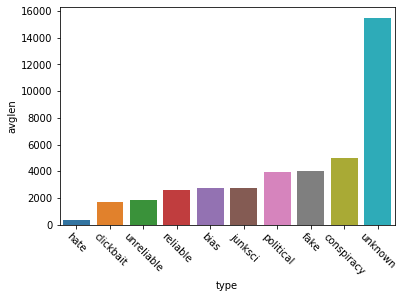

In [15]:
sns.barplot(x='type', y='avglen', data=df)
plt.xticks(rotation = -45)